# Prey vs. Predator System

We consider the existence of two species in an ecosystem: Predators with population $y$ and Prey with population $x$. They abide by the following rules:

* Prey grows if there are no predators.
* Predators die if there are no prey.

These rules can be translated to math as follows:

$x_t = x_{t-1} + r_x x_{t-1}\biggl(1 - \dfrac{x_{t-1}}{K}\biggr)$
<br>
$y_t = y_{t-1} - d_y y_{t-1}$

This assumes that the population of the prey will follow a logistic growth model, limited by its carrying capacity $K$. Predators follow an exponential decay model. $r_x$ is the growth rate of the prey, $d_y$ is the death rate of the predators.

However, we haven't even considered the interactions between prey and predator in these equations. Doing so only requires a few extra terms:

$x_t = x_{t-1} + r_x x_{t-1}\biggl(1 - \dfrac{x_{t-1}}{K}\biggr) - d_x(y_{t-1})x_{t-1}$
<br>
$y_t = y_{t-1} - d_y y_{t-1} + r_y(x_{t-1})y_{t-1}$

Here, $d_x(y_{t-1})$ and $r_y(x_{t-1})$ are currently-unknown functions, representing the death rate of the Prey due to Predators and the growth rate of the Predators due to Prey, respectively. A viable formula for $d_x(y)$ could be:

$d_x(y) = 1 - \dfrac{1}{by + 1}$

which follow the logic that the death rate of the prey should be 0 if there are no predators, and 1 if there are a large number of predators. $b$ is an arbitrary constant that gives more weight to the number of predators and their effects on the prey population. Likewise, a simple formula for $r_y(x)$ could be:

$r_y(x) = cx$

where $c$ is another arbitrary constant. Putting everything together we get:

$x_t = x_{t-1} + r_x x_{t-1}\biggl(1 - \dfrac{x_{t-1}}{K}\biggr) - \biggl(1 - \dfrac{1}{by_{t-1} + 1}\biggr)x_{t-1} $
<br>
$y_t = y_{t-1} - d_y y_{t-1} + cx_{t-1}y_{t-1}$

Now to simulate the model:

## Code

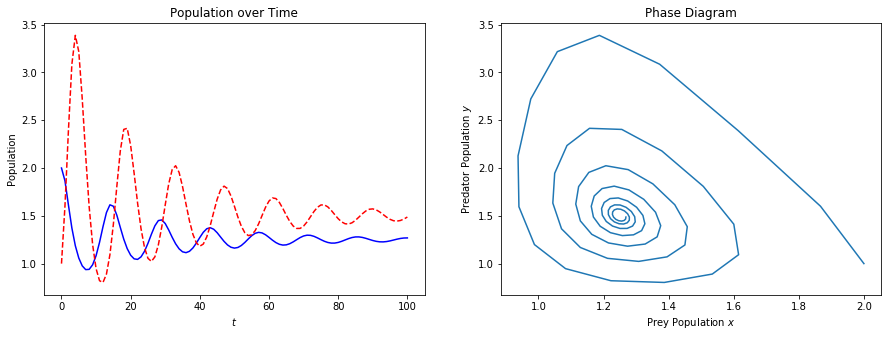

In [93]:
from __future__ import division
import matplotlib.pyplot as plt

#Define our arbitrary parameters:
K = 5 #Carrying capacity
rx = 1 #Growth rate of Prey
dy = 1 #Death rate of Predators
b = 2 #Arbitrary weights
c = 0.8

timesteps = 100 #Number of timesteps to iterate through

#Store each timestep
x_res = []
y_res = []

#Initialize x and y:
x = 2
y = 1

x_res.append(x)
y_res.append(y)

for i in range(timesteps):
    x_store = x + rx*x*(1 - x / K) - (1 - 1 / (b*y + 1))*x
    y_store = y - dy*y + c*x*y
    
    x, y = x_store, y_store
    
    x_res.append(x)
    y_res.append(y)


plt.figure(1, figsize=(15,5))
plt.subplot(121)
plt.title("Population over Time")
plt.xlabel("$t$")
plt.ylabel("Population")
plt.plot(x_res, 'b')
plt.plot(y_res, 'r--')

plt.subplot(122)
plt.title("Phase Diagram")
plt.xlabel("Prey Population $x$")
plt.ylabel("Predator Population $y$")
plt.plot(x_res, y_res)


plt.show()